In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [2]:
train = pd.read_csv('train.csv')
train

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [3]:
test = pd.read_csv('test.csv')
test

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36 months,3 years,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0
64193,TEST_64193,30000000,60 months,10+ years,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0
64194,TEST_64194,6120000,36 months,10+ years,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0
64195,TEST_64195,11520000,36 months,10+ years,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0


In [4]:
categorical = [var for var in train.columns if train[var].dtype == 'O']
print('범주형 컬럼:',categorical)

numerical = [var for var in train.columns if train[var].dtype != 'O']
print("숫자형 컬럼:", numerical)

범주형 컬럼: ['ID', '대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급']
숫자형 컬럼: ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']


In [5]:
for var in train[categorical]:
    print(train[var].value_counts() / np.float(len(train)))

TRAIN_67789    0.00001
TRAIN_37518    0.00001
TRAIN_84898    0.00001
TRAIN_80699    0.00001
TRAIN_84549    0.00001
                ...   
TRAIN_36024    0.00001
TRAIN_61166    0.00001
TRAIN_81100    0.00001
TRAIN_26212    0.00001
TRAIN_24761    0.00001
Name: ID, Length: 96294, dtype: float64
 36 months    0.669606
 60 months    0.330394
Name: 대출기간, dtype: float64
10+ years    0.328006
2 years      0.087752
< 1 year     0.080732
3 years      0.078728
1 year       0.064895
Unknown      0.058893
5 years      0.058830
4 years      0.058031
8 years      0.050761
6 years      0.040231
7 years      0.039608
9 years      0.038881
10+years     0.009305
<1 year      0.003842
3            0.000924
1 years      0.000582
Name: 근로기간, dtype: float64
MORTGAGE    0.497788
RENT        0.391561
OWN         0.110640
ANY         0.000010
Name: 주택소유상태, dtype: float64
부채 통합     0.572725
신용 카드     0.254429
주택 개선     0.063971
기타        0.049068
주요 구매     0.018724
의료        0.010790
자동차       0.008277
소규모 사업   

<ipython-input-5-64a1766485ea>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(train[var].value_counts() / np.float(len(train)))


In [6]:
for var in train[categorical]:
    print(var,"contains",train[var].unique())

ID contains ['TRAIN_00000' 'TRAIN_00001' 'TRAIN_00002' ... 'TRAIN_96291' 'TRAIN_96292'
 'TRAIN_96293']
대출기간 contains [' 36 months' ' 60 months']
근로기간 contains ['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']
주택소유상태 contains ['RENT' 'MORTGAGE' 'OWN' 'ANY']
대출목적 contains ['부채 통합' '주택 개선' '주요 구매' '휴가' '의료' '자동차' '신용 카드' '소규모 사업' '기타' '이사' '주택'
 '재생 에너지']
대출등급 contains ['C' 'B' 'A' 'D' 'F' 'G' 'E']


In [7]:
train.replace({'근로기간' : '<1 year'}, '< 1 year', inplace=True)
train.replace({'근로기간' : '10+years'}, '10+ years', inplace=True)
train.replace({'근로기간' : '1 years'}, '1 year', inplace=True)
train.replace({'근로기간' : '3'}, '3 years', inplace=True)

train.replace({'근로기간' : 'Unknown'}, np.NaN, inplace=True)

In [8]:
# 범주형 컬럼을 뽑아낸 categorical 변수에서 ID 값을 제거 

categorical.remove('ID')

In [9]:
def simple_imputation(df, column_name):
    # 결측치가 있는 열을 선택
    missing_values = df[column_name].isnull()
    
    # 결측치가 아닌 값들의 확률 분포 계산
    non_missing_values = df.loc[~missing_values, column_name]
    probabilities = non_missing_values.value_counts(normalize=True)
    
    # 결측치 대체
    imputed_values = np.random.choice(probabilities.index, size=missing_values.sum(), p=probabilities.values)
    
    # 대체된 값으로 결측치 채우기
    df.loc[missing_values, column_name] = imputed_values
    
    return df


# 단순 확률 대치법 적용
column_to_impute = '근로기간'
df = simple_imputation(train, column_to_impute)

# 결과 출력
print(df)

                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months     1 year      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0           

In [10]:
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [11]:
train.drop('ID',axis=1, inplace=True)

In [12]:
train

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,1 year,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [13]:
loan_due = train.groupby('대출등급')['대출기간'].value_counts().reset_index
loan_due

<bound method Series.reset_index of 대출등급  대출기간      
A      36 months    15952
       60 months      820
B      36 months    22883
       60 months     5934
C      36 months    16935
       60 months    10688
D      60 months     6869
       36 months     6485
E      60 months     5459
       36 months     1895
F      60 months     1684
       36 months      270
G      60 months      361
       36 months       59
Name: 대출기간, dtype: int64>

In [14]:
object_data=train.select_dtypes(['object'])
object_data

,대출기간,근로기간,주택소유상태,대출목적,대출등급
0,36 months,6 years,RENT,부채 통합,C
1,60 months,10+ years,MORTGAGE,주택 개선,B
2,36 months,5 years,MORTGAGE,부채 통합,A
3,36 months,8 years,MORTGAGE,부채 통합,C
4,60 months,1 year,RENT,주요 구매,B
...,...,...,...,...,...
96289,36 months,10+ years,MORTGAGE,신용 카드,C
96290,60 months,10+ years,MORTGAGE,주택 개선,E
96291,36 months,1 year,MORTGAGE,신용 카드,A
96292,36 months,5 years,MORTGAGE,부채 통합,D


In [15]:
object_data

,대출기간,근로기간,주택소유상태,대출목적,대출등급
0,36 months,6 years,RENT,부채 통합,C
1,60 months,10+ years,MORTGAGE,주택 개선,B
2,36 months,5 years,MORTGAGE,부채 통합,A
3,36 months,8 years,MORTGAGE,부채 통합,C
4,60 months,1 year,RENT,주요 구매,B
...,...,...,...,...,...
96289,36 months,10+ years,MORTGAGE,신용 카드,C
96290,60 months,10+ years,MORTGAGE,주택 개선,E
96291,36 months,1 year,MORTGAGE,신용 카드,A
96292,36 months,5 years,MORTGAGE,부채 통합,D


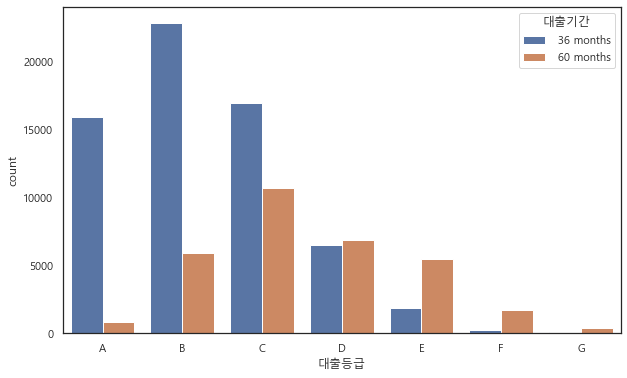

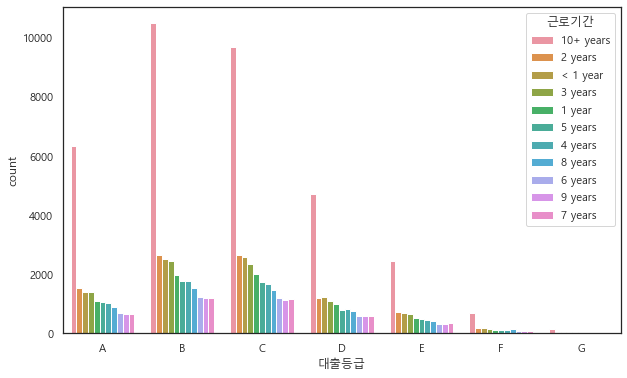

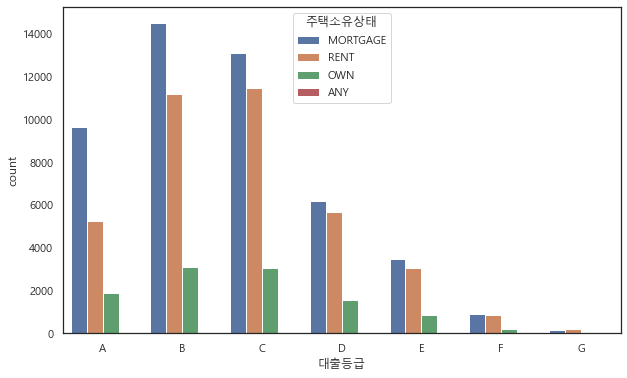

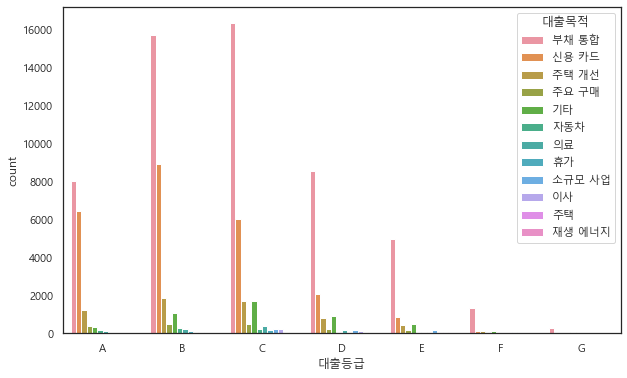

In [16]:
for var in train[categorical]:
    if var != '대출등급':
        count_data = train[categorical].groupby(['대출등급'])[var].value_counts().reset_index(name='count')
        
        plt.figure(figsize=(10,6))
        sns.barplot(x='대출등급', y='count', data=count_data, hue=var)